# Part II - (Prosper-Loan-Data )
## by (Ghazal AbuFarha)

### Investigation Overview

The aim of this investigation is to analyze and present trends in borrowing behavior. This includes examining the most common types of loans, loan amounts, reasons for borrowing, interest rates, and borrower characteristics over time. The insights gained from this analysis will provide a clearer understanding of borrower behavior, the factors that influence their borrowing decisions, and the changes in financial conditions they experience. This investigation will identify patterns in loan requests, focusing on aspects such as borrower income, credit scores, loan categories, and interest rates.
## Dataset Overview and Executive Summary

This dataset contains information about personal loans, including data on loan amounts, interest rates, reasons for borrowing, borrower characteristics (such as income level and credit scores), loan status, and historical trends.

>Key insights include:

- **Loan Amounts:** Most loans are typically categorized into amounts of $5,000, $10,000, $15,000, and $20,000. Over time, the average loan amount has steadily increased.

- **Reasons for Borrowing:** The primary reason for borrowing is debt consolidation, indicating that borrowers often face urgent financial challenges.

- **Loan Types:** Debt consolidation loans are the most common, followed closely by home improvement loans.

- **Interest Rates:** Borrowers experience interest rates ranging from 0% to 36%. While rates increased after 2008, no loans with a 0% interest rate have been issued since that year.

- **Borrower Characteristics:** Borrowers with higher incomes and better credit scores are more likely to obtain loans and tend to receive lower interest rates.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prosper-Loan-Data/cleaned_data.csv')
data.head()

Mounted at /content/drive


,term,loan_status,borrower_apr,borrower_rate,prosper_rating_numeric,prosper_rating_alpha,listing_category_numeric,borrower_state,occupation,employment_status,...,percent_funded,recommendations,investment_from_friends_count,investment_from_friends_amount,investors,loan_origination_year,IncomeCategory,credit_score_avg,CreditScoreCategory,listing_category
0,36,Completed,0.16516,0.1580,NaN,NaN,0,CO,Other,Self-employed,...,1.0,0,0,0.0,258,2007,2K-4K,649.5,Medium,Not Available
1,36,Current,0.12016,0.0920,6.0,A,2,CO,Professional,Employed,...,1.0,0,0,0.0,1,2014,>6K,689.5,Medium,Home Improvement
2,36,Current,0.12528,0.0974,6.0,A,16,GA,Skilled Labor,Employed,...,1.0,0,0,0.0,158,2012,2K-4K,809.5,Excellent,Motorcycle
3,36,Current,0.24614,0.2085,3.0,D,2,MN,Executive,Employed,...,1.0,0,0,0.0,20,2013,>6K,689.5,Medium,Home Improvement
4,60,Current,0.15425,0.1314,5.0,B,1,NM,Professional,Employed,...,1.0,0,0,0.0,1,2013,>6K,749.5,High,Debt Consolidation


## Visualization 1: Loan Amount Distribution
This visualization will show the distribution of loan amounts within the dataset, emphasizing the frequency at key intervals such as $5,000, $10,000, $15,000, and $20,000.

**Comment:** The frequency of loan amounts at these key intervals indicates that borrowers typically request loans within specific ranges. This trend may be influenced by common borrowing needs and lending structures, potentially reflecting standardized loan categories or limits.



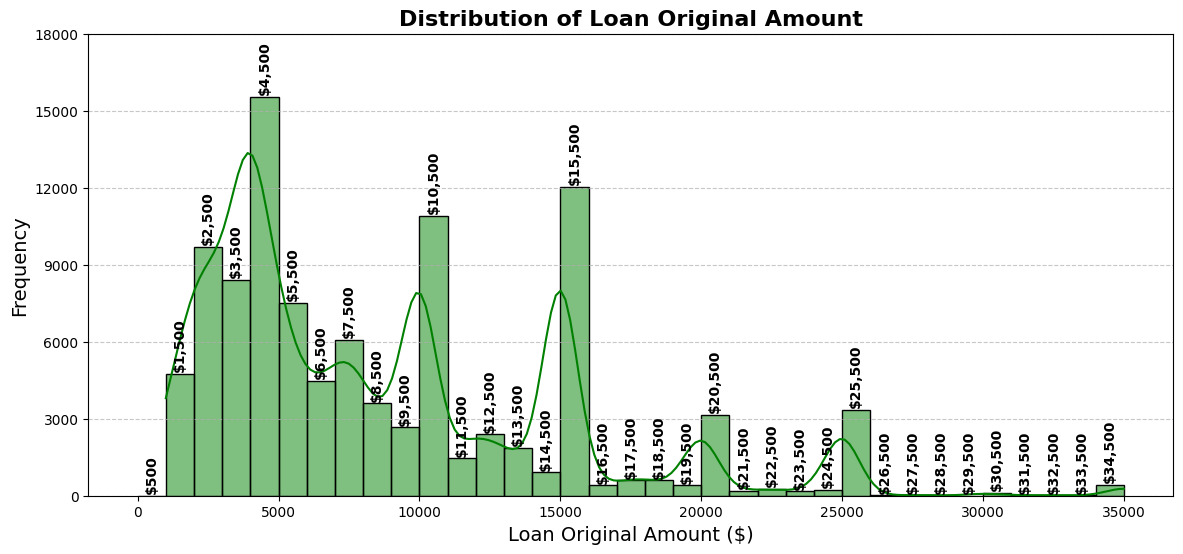

In [3]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Define bin edges for better control over intervals
bins = np.arange(0, 36000, 1000)  # Loan amounts binned every $1,000

# Plot the histogram with KDE
ax = sns.histplot(data['loan_original_amount'], bins=bins, kde=True, color='green', edgecolor='black')
# Show the bin values (loan amounts) above the bars
for p in ax.patches:
    bin_center = p.get_x() + p.get_width() / 2  # Get the center of each bin
    plt.text(bin_center, p.get_height() + 200,  # Position above the bar
             f'${int(bin_center):,}', ha='center', fontsize=10, fontweight='bold', color='black', rotation=90)  # Rotate text

# Add title and labels
plt.title('Distribution of Loan Original Amount', fontsize=16, fontweight='bold')
plt.xlabel('Loan Original Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(range(0, 20000, 3000))

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Visualization 2: Loan Types and Reasons for Borrowing
This visualization will display the distribution of different loan types (e.g., debt consolidation, home improvement) along with the reasons individuals choose to borrow.

**Comment:** Debt consolidation is the most common reason for borrowing, which aligns with its widespread use as a financial strategy for managing existing debt. Understanding the motivations behind borrowing can help identify areas where financial support or guidance may be necessary.

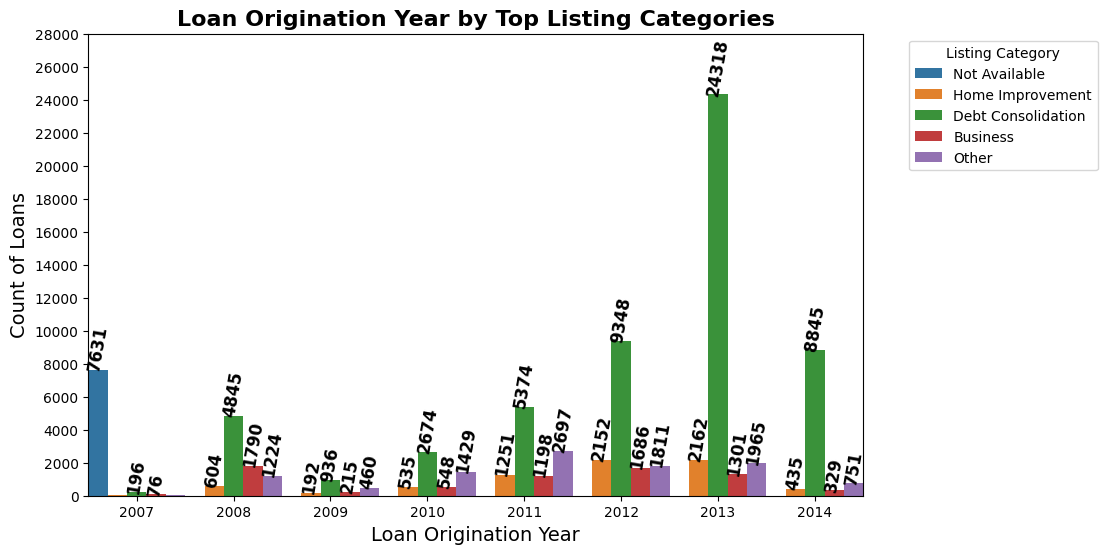

In [4]:
#Identifying the top 5 most common loan categories
top_categories = data['listing_category'].value_counts().nlargest(5).index

# Filter the data to include only the top categories
filtered_data = data[data['listing_category'].isin(top_categories)]

# Set figure size
plt.figure(figsize=(10, 6))

# Create the clustered bar chart
ax = sns.countplot(x='loan_origination_year', hue='listing_category', data=filtered_data,width=1)

# Annotate bars with the loan count
for p in ax.patches:
    height = p.get_height()  # Get the height (count) of each bar
    if height > 20:
        plt.text(p.get_x() + p.get_width() / 2, height + 100,  # Position above bar
                 f'{int(height)}', ha='center', fontsize=12, fontweight='bold', color='black', rotation=80)  # Rotate label

# Add title and labels
plt.title('Loan Origination Year by Top Listing Categories', fontsize=16, fontweight='bold')
plt.xlabel('Loan Origination Year', fontsize=14)
plt.ylabel('Count of Loans', fontsize=14)

plt.legend(title='Listing Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis ticks with smaller intervals for more values
plt.yticks(range(0, 30000, 2000))
# Show the plot
plt.show()


## Visualization 3: Interest Rates Over Time
This chart illustrates the trend in interest rates over time, with a particular focus on the changes that occurred between 2008 and 2014.  

**Comment:** Overall, interest rates have generally increased over the years, and the prevalence of 0% interest loans vanished after 2008. This trend may be influenced by economic shifts, regulatory changes, or stricter risk assessments by lenders.

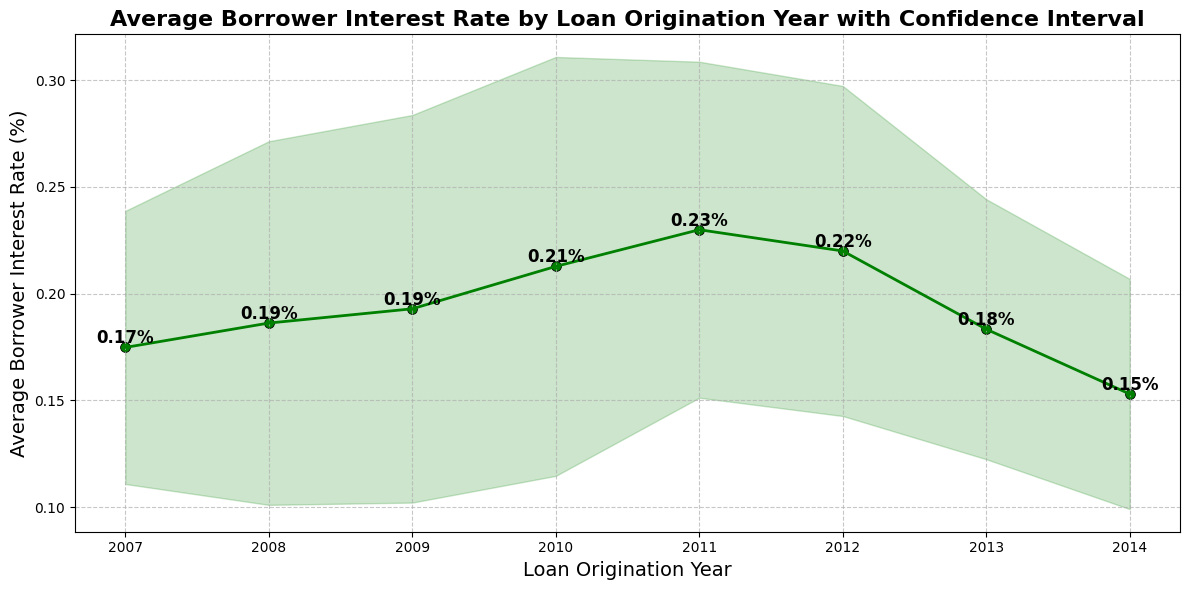

In [5]:
plt.figure(figsize=(12, 6))

# line plot with shaded confidence interval
sns.lineplot(
    data=data,
    x='loan_origination_year',
    y='borrower_rate',
    estimator='mean',
    ci='sd',
    color='green',
    linewidth=2
)

# Add the dots for each year (mean values)
mean_values = data.groupby('loan_origination_year')['borrower_rate'].mean()
sns.scatterplot(
    x=mean_values.index,
    y=mean_values.values,
    color='green',
    s=50,  # Size of the dots
    edgecolor='black',
    marker='o'
)

# Annotate the dots with the mean values
for year, rate in mean_values.items():
    plt.text(year, rate, f'{rate:.2f}%', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add title and labels
plt.title('Average Borrower Interest Rate by Loan Origination Year with Confidence Interval', fontsize=16, fontweight='bold')
plt.xlabel('Loan Origination Year', fontsize=14)
plt.ylabel('Average Borrower Interest Rate (%)', fontsize=14)

# Show grid and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
